In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [214]:
df = pd.read_csv("player_data.csv")
df.head()

,practice_hours_weekly,performed_well
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


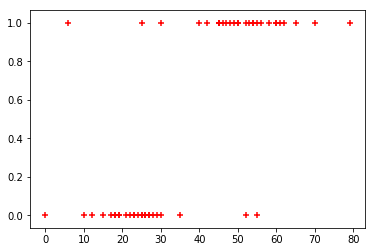

In [255]:
plt.scatter(df.practice_hours_weekly,df.performed_well,marker='+',color='red')

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(df[['practice_hours_weekly']],df.performed_well,test_size=0.1)

In [258]:
X_test

,practice_hours_weekly
33,30
24,50
43,27
32,45
22,40
35,70


In [259]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [260]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [261]:
model.predict(X_test)

array([0, 1, 0, 1, 1, 1], dtype=int64)

In [243]:
model.predict_proba(X_test)

array([[0.56273891, 0.43726109],
       [0.24921852, 0.75078148],
       [0.23611397, 0.76388603],
       [0.45620465, 0.54379535],
       [0.16769937, 0.83230063],
       [0.1778911 , 0.8221089 ]])

In [263]:
model.predict(67)

array([1], dtype=int64)

In [245]:
model.score(X_test,y_test)

0.8333333333333334

In [246]:
model.predict_proba(X_test)

array([[0.56273891, 0.43726109],
       [0.24921852, 0.75078148],
       [0.23611397, 0.76388603],
       [0.45620465, 0.54379535],
       [0.16769937, 0.83230063],
       [0.1778911 , 0.8221089 ]])

In [247]:
model.score(X_test,y_test)

0.8333333333333334

In [248]:
X_test

,practice_hours_weekly
13,29
41,48
14,49
34,35
15,55
25,54


In [264]:
coef = model.coef_

In [265]:

intercept = model.intercept_

In [251]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [252]:
def prediction_function(practice_hours):
    z = coef * practice_hours + intercept
    y = sigmoid(z)
    return y

In [253]:
practice_hours = 80
prediction_function(practice_hours)

0.9672326784147307

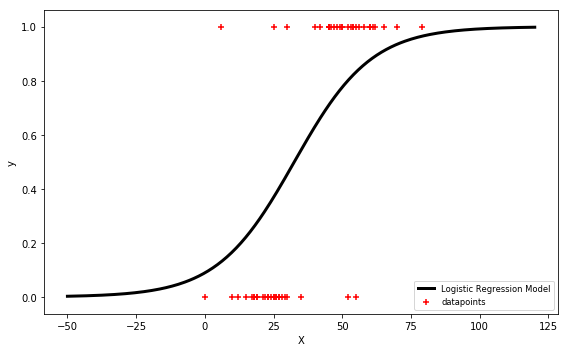

In [254]:
# and plot the result df.practice_hours_weekly,df.performed_well
from sklearn import linear_model
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.scatter(df.practice_hours_weekly.ravel(), df.performed_well, marker='+', color='red', zorder=20)
X_test = np.linspace(-50, 120, 300)

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color='black', linewidth=3)


plt.ylabel('y')
plt.xlabel('X')

plt.legend(('Logistic Regression Model','datapoints'),
            loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()